# SVM Lineal

$$ Loss = \frac{1}{n} \sum_{i=1}^n \max(0,1 - y_i(Ax_i -b)) + \alpha||A||^2 $$


- $A$: es el vector de las pendientes en cada variable
- $b$: es la ordenada en el origen (intercept)
- $x=(x_1, x_2, ..., x_n)$ es el vetor de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regulación y suavizado de la separación

In [114]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [115]:
session = tf.Session()

In [116]:
iris = datasets.load_iris()

x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [117]:
y_vals

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [118]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))

x_train = x_vals[train_idx]
y_train = y_vals[train_idx]
x_test = x_vals[test_idx]
y_test = y_vals[test_idx]

In [119]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 2), (120,), (30, 2), (30,))

In [120]:
batch_size = 100

In [121]:
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [122]:
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [123]:
l2_norm = tf.reduce_sum(tf.square(A)) # ||A||^2
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

$ y_{pred} = Ax - b $
- $ y_{pred} = 1 \rightarrow Setosa $
- $ y_{pred} = -1 \rightarrow No \ setosa $

In [124]:
prediction = tf.sign(model_output) # Returns an element-wise indication of the sign of a number.
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [125]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
session.run(init)

In [126]:
loss_vector = []
train_acc = []
test_acc = []

for i in range(1000):
    rand_idx = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_idx]
    rand_y = np.transpose([y_train[rand_idx]])
    session.run(train, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vector.append(temp_loss)
    
    train_accuracy = session.run(accuracy, feed_dict={x_data: x_train, y_target: np.transpose([y_train])})
    train_acc.append(train_accuracy)
    
    test_accuracy = session.run(accuracy, feed_dict={x_data: x_test, y_target: np.transpose([y_test])})
    test_acc.append(test_accuracy)
    
    if (i+1)%100 == 0:
        print("Step #{} ==> A: {}, b: {}, Loss: {}".format(i+1, session.run(A), session.run(b), temp_loss))

Step #100 ==> A: [[-0.29870155]
 [-0.27781555]], b: [[-1.2123227]], Loss: [0.45363897]
Step #200 ==> A: [[-0.2551639 ]
 [-0.47610086]], b: [[-1.2503227]], Loss: [0.38241887]
Step #300 ==> A: [[-0.21945475]
 [-0.63360554]], b: [[-1.2890227]], Loss: [0.37031567]
Step #400 ==> A: [[-0.19331214]
 [-0.75842124]], b: [[-1.3278229]], Loss: [0.40116724]
Step #500 ==> A: [[-0.17375548]
 [-0.86373645]], b: [[-1.3676231]], Loss: [0.37482762]
Step #600 ==> A: [[-0.15587161]
 [-0.94229716]], b: [[-1.4068226]], Loss: [0.37385932]
Step #700 ==> A: [[-0.15488602]
 [-1.0116752 ]], b: [[-1.4444231]], Loss: [0.37846124]
Step #800 ==> A: [[-0.15660518]
 [-1.0718601 ]], b: [[-1.4854231]], Loss: [0.35624528]
Step #900 ==> A: [[-0.1450322]
 [-1.1121329]], b: [[-1.5265228]], Loss: [0.36447644]
Step #1000 ==> A: [[-0.14148606]
 [-1.1481696 ]], b: [[-1.5667223]], Loss: [0.32214174]


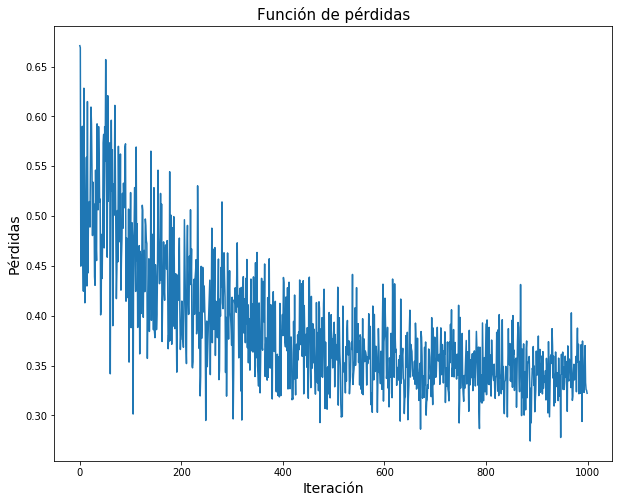

In [127]:
plt.figure(figsize=(10,8))
plt.plot(loss_vector)
plt.title("Función de pérdidas", fontsize=15)
plt.xlabel("Iteración", fontsize=14)
plt.ylabel("Pérdidas", fontsize=14)
plt.show()

In [128]:
[[a1], [a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2/a1
intercept = b/a1

x1_vals = [d[1] for d in x_vals]

best_fit = []

for x in x1_vals:
    best_fit.append(slope*x + intercept)

In [129]:
setosa_x = [element[1] for idx, element in enumerate(x_vals) if y_vals[idx] == 1]
setosa_y = [element[0] for idx, element in enumerate(x_vals) if y_vals[idx] == 1]

no_setosa_x = [element[1] for idx, element in enumerate(x_vals) if y_vals[idx] == -1]
no_setosa_y = [element[0] for idx, element in enumerate(x_vals) if y_vals[idx] == -1]

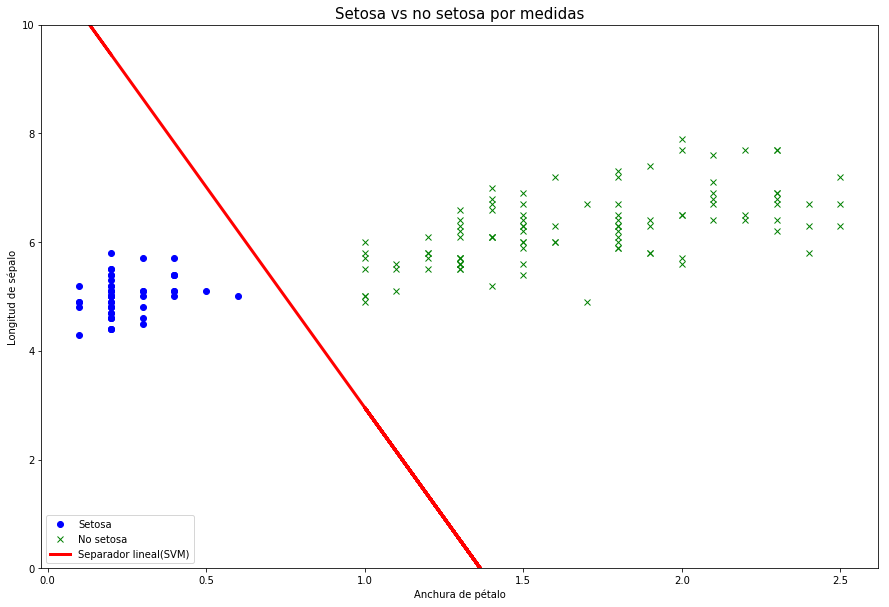

In [134]:
plt.figure(figsize=(15,10))
plt.plot(setosa_x, setosa_y, "bo", label="Setosa")
plt.plot(no_setosa_x, no_setosa_y, "gx", label="No setosa")
plt.plot(x1_vals, best_fit, "r-", label="Separador lineal(SVM)", linewidth=3)
plt.legend(loc="lower left")
plt.xlabel("Anchura de pétalo")
plt.ylabel("Longitud de sépalo")
plt.title("Setosa vs no setosa por medidas", fontsize=15)
plt.ylim([0,10])
plt.show()

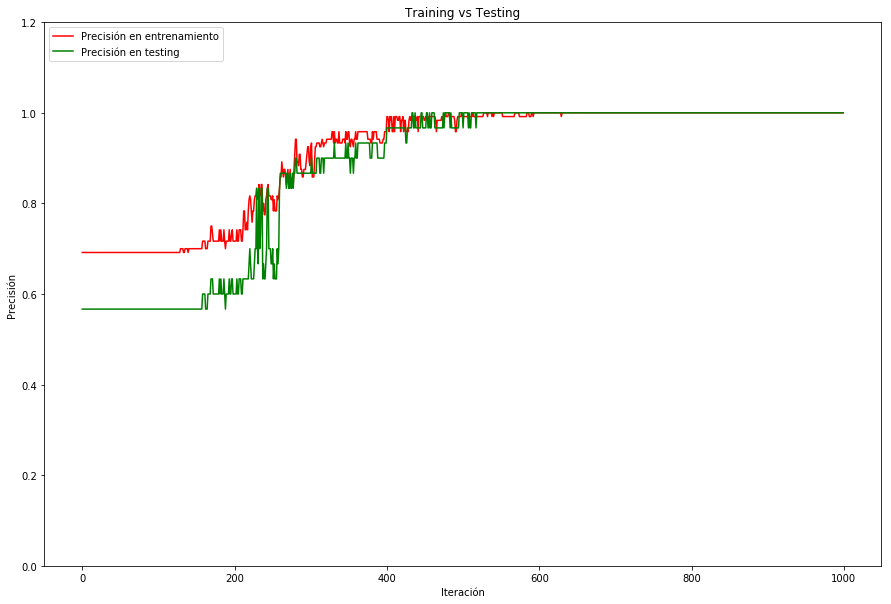

In [138]:
plt.figure(figsize=(15,10))
plt.plot(train_acc, "r-", label="Precisión en entrenamiento")
plt.plot(test_acc, "g-", label="Precisión en testing")
plt.legend(loc="upper left")
plt.title("Training vs Testing")
plt.xlabel("Iteración")
plt.ylabel("Precisión")
plt.ylim([0,1.2])
plt.show()